<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

### Question(s) for Analysis
> I want to investigate the relationship between a movie's genre & director and how they did at the box office. I also want to explore the popularity of genres throughout the decades and the relationship between budget and revenue

In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [102]:
# Load data and print first 5 rows
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Let's see the columns we have available

In [103]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Let's describe the data set

In [104]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [105]:
# Get information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [106]:
# Let's see the nulls now 

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [107]:
# we need to evaluate the directors so let's drop the ones with nulls 

df.director = df.director.dropna()
df.director.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10866 entries, 0 to 10865
Series name: director
Non-Null Count  Dtype 
--------------  ----- 
10822 non-null  object
dtypes: object(1)
memory usage: 85.0+ KB



### Data Cleaning
> To allow date comparisons let's turn years into a datetime object


In [108]:
df.release_year.head()

df.release_year = pd.to_datetime(df.release_year, format="%Y")
df.release_year.dtype

dtype('<M8[ns]')

In [109]:
df['release_decade'] = (df.release_year.dt.year // 10) * 10
df.release_decade.tail()

10861    1960
10862    1960
10863    1960
10864    1960
10865    1960
Name: release_decade, dtype: int32

In [110]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'release_decade'],
      dtype='object')

In [97]:
def split_and_replace(column):
    column = column.lower().replace(" ", "_")
    return column

In [112]:
unique_genres = df.genres.str.split('|', expand=True).stack().unique()
unique_genres

for genre in unique_genres: 
    df[genre] = df.genres.astype(str).str.contains(genre).astype(int)


    
df.columns = [split_and_replace(col) for col in df.columns]

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,comedy,mystery,romance,war,history,music,horror,documentary,tv_movie,foreign
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'release_decade', 'action', 'adventure',
       'science_fiction', 'thriller', 'fantasy', 'crime', 'western', 'drama',
       'family', 'animation', 'comedy', 'mystery', 'romance', 'war', 'history',
       'music', 'horror', 'documentary', 'tv_movie', 'foreign', 'action',
       'adventure', 'science_fiction', 'thriller', 'fantasy', 'crime',
       'western', 'drama', 'family', 'animation', 'comedy', 'mystery',
       'romance', 'war', 'history', 'music', 'horror', 'documentary',
       'tv_movie', 'foreign'],
      dtype='object')

In [114]:
unique_genres_split = [split_and_replace(genre) for genre in unique_genres]
unique_genres_split

['action',
 'adventure',
 'science_fiction',
 'thriller',
 'fantasy',
 'crime',
 'western',
 'drama',
 'family',
 'animation',
 'comedy',
 'mystery',
 'romance',
 'war',
 'history',
 'music',
 'horror',
 'documentary',
 'tv_movie',
 'foreign']

We create a new dataframe which harbors all genres in a single row for analysis. This creates duplicate rows, but it does signal popularity because a science fiction movie can also be an action movie. If they're classified as both, they should be counted as both. 

In [115]:
df_long = pd.melt(
    df,
    id_vars=['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date', 'release_decade',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
    value_vars=unique_genres_split,
    var_name='genre',
    value_name='is_genre'
)


df_long = df_long[df_long['is_genre']==1].reset_index(drop=True)
df_long.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,release_decade,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,is_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2010,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09,action,1
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2010,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08,action,1
2,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2010,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09,action,1
3,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2010,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09,action,1
4,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Paramount Pictures|Skydance Productions,6/23/15,2010,2598,5.8,2015-01-01,1.425999e+08,4.053551e+08,action,1


<a id='eda'></a>
## Exploratory Data Analysis

> Let's clean the dataset and create different charts to see the distributions

### What's the distribution of the genres along the decades?

<Figure size 1200x600 with 0 Axes>

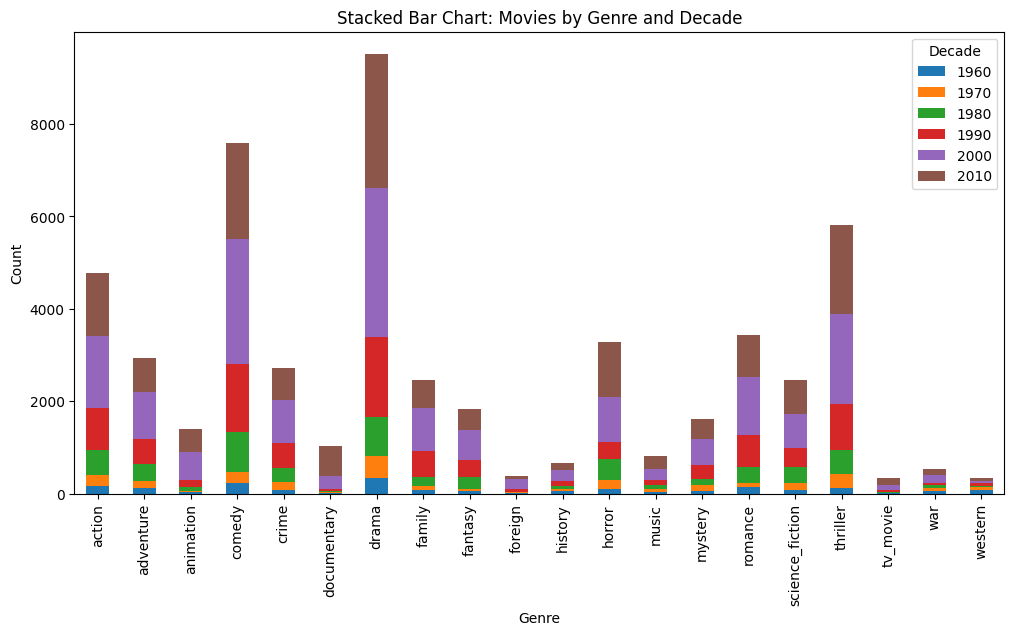

In [116]:
import seaborn as sns
genre_decade_counts = df_long.groupby(['genre', 'release_decade']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
genre_decade_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Stacked Bar Chart: Movies by Genre and Decade')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Decade')
plt.show()

## Is there a trend between the budget of a movie and its revenue?

<Axes: xlabel='budget', ylabel='revenue'>

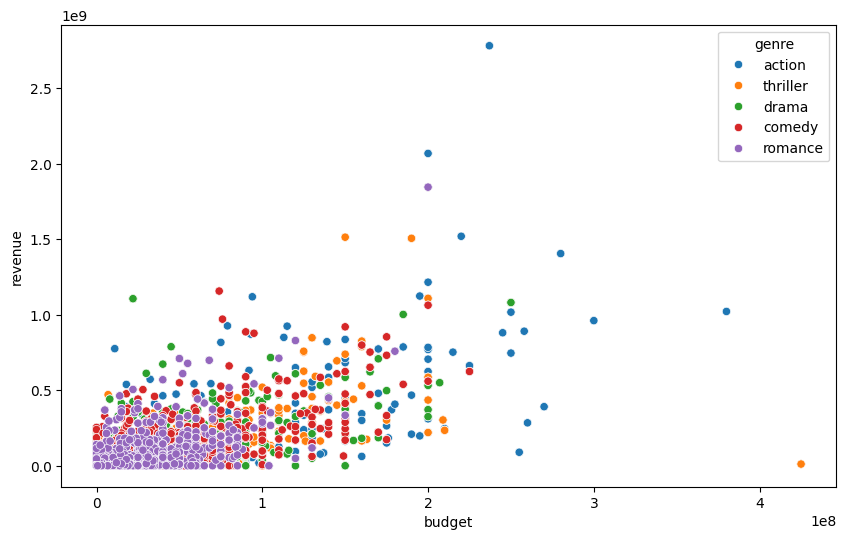

In [117]:
plt.figure(figsize=(10,6))
main_genres = df_long['genre'].value_counts().nlargest(5).index
df_top_genres = df_long[df_long['genre'].isin(main_genres)]
sns.scatterplot(data=df_top_genres, x='budget', y='revenue', hue='genre')

In [118]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### What's the average rating by genre? 

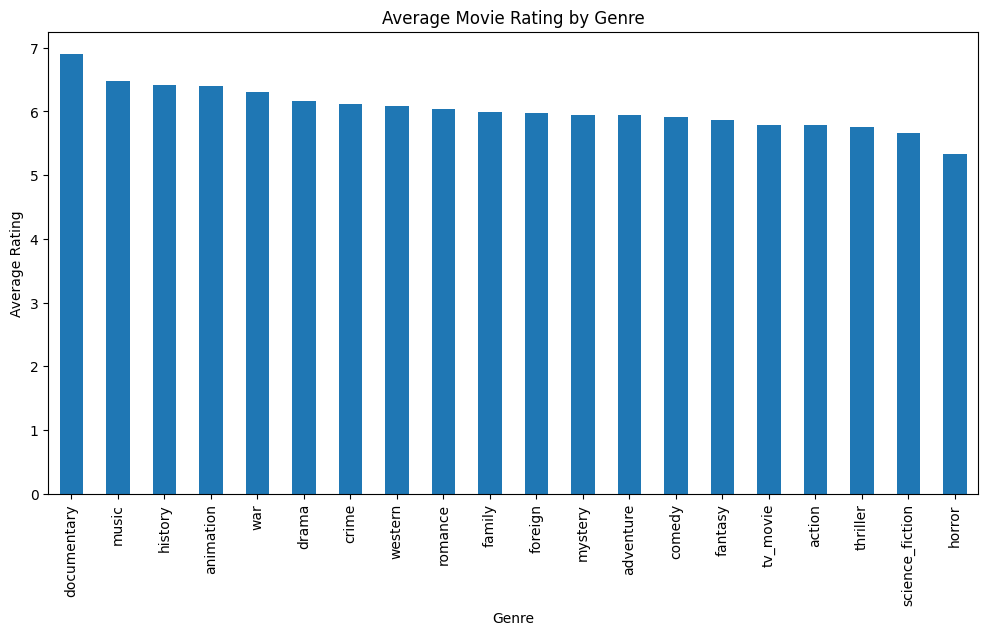

In [119]:
df_genre_rating = df_long.groupby('genre')['vote_average'].mean().sort_values(ascending=False)
df_genre_rating.plot(kind='bar', figsize=(12,6))
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()



## What about the top 5 genres?

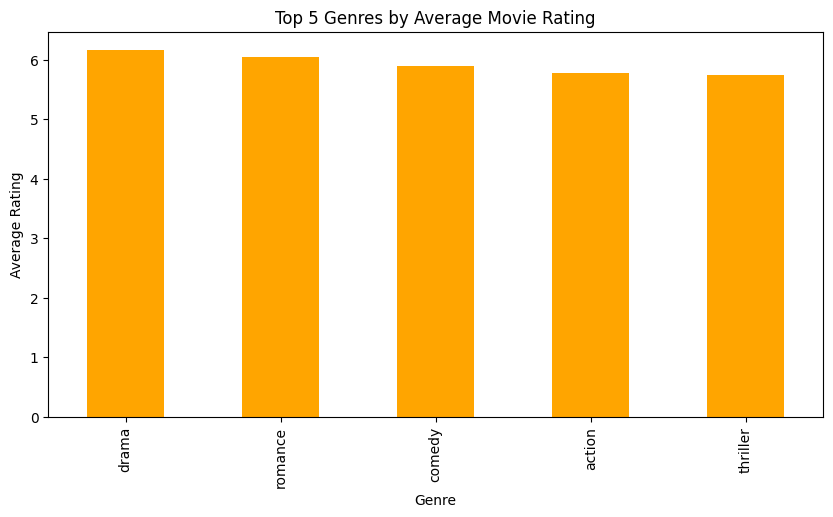

In [120]:

df_genre_rating_top5 = df_genre_rating[df_genre_rating.index.isin(main_genres)]
df_genre_rating_top5.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Top 5 Genres by Average Movie Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

<Axes: xlabel='director'>

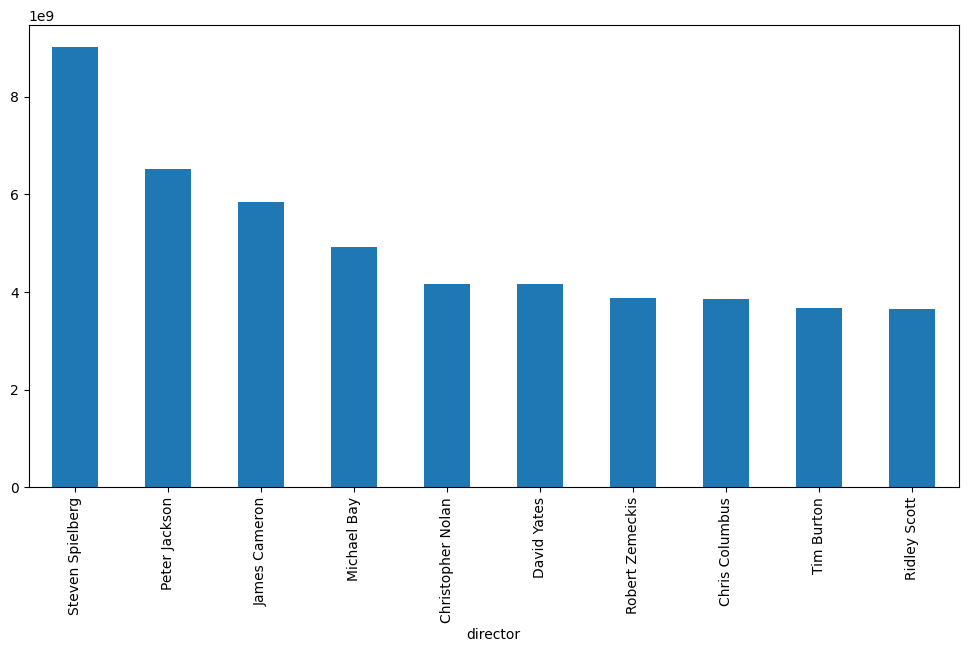

In [121]:
df_directors = df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10)
df_directors.plot(kind='bar', figsize=(12,6))

<a id='conclusions'></a>
## Conclusions

> There seems to be a correlation between budget and revenue
>
> The top 5 genres are not the highest rated ones, documentary takes the crown
>
> The dataset seems biased towards movies > 2000s. No movies before 1960s are in the dataset.
>
> Steven Spielberg seems to be the highest revenue director. Again confirming the bias of the dataset that includes almost no directors from before the 1980s. 

In [122]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 577107 bytes to Investigate_a_Dataset.html
